In [1]:
%matplotlib inline
import geodatasets
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry as sg
import json

In [2]:
unfallorte = gp.read_file("./Unfallorte2023_EPSG25832_Shape/shp/Unfallorte_2023_LR_BasisDLM.shp")

/home/morit/Dokumente/GitHub/vru_safety_app/Unfallatlas/venv/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'PointM' is converted to 'Point'
  return ogr_read(


In [3]:
unfall_geo = unfallorte.to_crs(epsg=4326)
unfall_geo

UIDENTSTLA ULAND UREGBEZ UKREIS UGEMEINDE UJAHR UMONAT  \
0       01230519134013042023    01       0     02       000  2023     05   
1       01230519134013022023    01       0     02       000  2023     05   
2       01230519125013522023    01       0     59       183  2023     05   
3       01230519125013272023    01       0     01       000  2023     05   
4       01230518181013802023    01       0     51       058  2023     05   
...                      ...   ...     ...    ...       ...   ...    ...   
269043  16231103001103679910    16       0     51       000  2023     11   
269044  16231107001301718380    16       0     67       089  2023     11   
269045  16231115001707698050    16       0     66       042  2023     11   
269046  16231116001413697620    16       0     55       000  2023     11   
269047  16231207001413741890    16       0     55       000  2023     12   

       USTUNDE UWOCHENTAG UKATEGORIE  ... IstFuss IstKrad IstGkfz IstSonstig  \
0           22          6          3  ...       0       0       0          0   
1           14          6          3  ...       0       0       0          1   
2           13          6          3  ...       0       0       0          0   
3           03          6          3  ...       0       0       0          0   
4           17          5          2  ...       0       1       0          0   
...        ...        ...        ...  ...     ...     ...     ...        ...   
269043      13          6          3  ...       0       0       0          0   
269044      09          3          2  ...       0       1       0          0   
269045      14          4          3  ...       1       0       0          0   
269046      10          5          3  ...       0       0       0          0   
269047      18          5          3  ...       1       0       0          0   

              LINREFX       LINREFY  XGCSWGS84  YGCSWGS84 PLST  \
0       574751.561900  6.018283e+06  10.148875  54.306951    1   
1       572054.233000  6.018075e+06  10.107378  54.305472    1   
2       526666.727000  6.066637e+06   9.414264  54.746277    1   
3       527894.073000  6.071521e+06   9.433799  54.790100    1   
4       499085.047300  6.017844e+06   8.985938  54.308482    1   
...               ...           ...        ...        ...  ...   
269043  648554.780642  5.651040e+06  11.116806  50.991751    2   
269044  622993.366257  5.640525e+06  10.749222  50.903263    2   
269045  599035.656995  5.603114e+06  10.398561  50.571539    2   
269046  663576.196771  5.650838e+06  11.330579  50.985861    2   
269047  663202.581608  5.651511e+06  11.325563  50.992015    2   

                         geometry  
0       POINT (10.14888 54.30695)  
1       POINT (10.10738 54.30547)  
2        POINT (9.41426 54.74628)  
3          POINT (9.4338 54.7901)  
4        POINT (8.98594 54.30848)  
...                           ...  
269043  POINT (11.11681 50.99175)  
269044  POINT (10.74922 50.90326)  
269045  POINT (10.39856 50.57154)  
269046  POINT (11.33058 50.98586)  
269047  POINT (11.32556 50.99201)  

[269048 rows x 26 columns]

In [4]:
print(unfall_geo.columns)

Index(['UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR',
       'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1',
       'ULICHTVERH', 'IstStrasse', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'PLST', 'geometry'],
      dtype='object')


<Axes: >

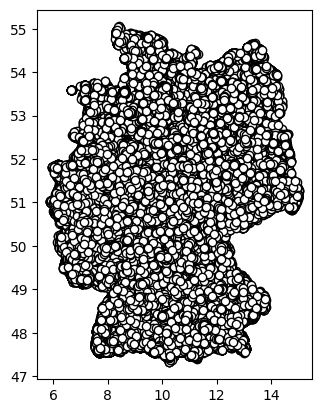

In [5]:
unfall_geo.plot(color="white", edgecolor="black")

In [6]:
regensburg_road = gp.read_file("./Regensburg-shp/shape/roads.shp")
regensburg_geo = regensburg_road.to_crs(epsg=4326)

In [7]:
oberpfalz_geo = gp.read_file("./oberpfalz-latest-free.shp/gis_osm_roads_free_1.shp").to_crs(epsg=4326)
oberpfalz_geo

osm_id  code        fclass              name      ref oneway  \
0          4013898  5111      motorway              None     A 93      F   
1          4013903  5111      motorway              None      A 3      F   
2          4013904  5111      motorway              None      A 3      F   
3          4013905  5111      motorway              None      A 3      F   
4          4015895  5111      motorway              None      A 3      F   
...            ...   ...           ...               ...      ...    ...   
331413  1388585739  5143  track_grade1              None     None      B   
331414  1388585740  5121  unclassified              None     None      B   
331415  1388585741  5114     secondary  Gredinger Straße  St 2336      B   
331416  1388585743  5143  track_grade1              None     None      B   
331417  1388611575  5152      cycleway              None     None      B   

        maxspeed  layer bridge tunnel  \
0            120      0      F      F   
1            100      0      F      F   
2            100      0      F      F   
3            100      0      F      F   
4            100      0      F      F   
...          ...    ...    ...    ...   
331413         0      0      F      F   
331414         0      0      F      F   
331415        50      0      F      F   
331416         0      0      F      F   
331417         0      0      F      F   

                                                 geometry  
0       LINESTRING (12.06474 48.97724, 12.06454 48.97757)  
1       LINESTRING (12.04256 48.99972, 12.04466 49.000...  
2       LINESTRING (12.06186 48.994, 12.06118 48.99504...  
3       LINESTRING (12.06217 48.99338, 12.06255 48.993...  
4       LINESTRING (12.03115 48.99597, 12.02962 48.99546)  
...                                                   ...  
331413  LINESTRING (11.38653 49.11471, 11.38652 49.114...  
331414  LINESTRING (11.38635 49.11496, 11.38642 49.115...  
331415   LINESTRING (11.4341 49.10847, 11.43415 49.10839)  
331416  LINESTRING (11.40109 49.11434, 11.40094 49.114...  
331417  LINESTRING (11.86292 49.44449, 11.86286 49.444...  

[331418 rows x 11 columns]

In [8]:
regensburg_geo = regensburg_geo.drop(regensburg_geo[regensburg_geo["type"] == "track"].index)
regensburg_geo = regensburg_geo.drop(regensburg_geo[regensburg_geo["type"] == "unclassified"].index)
regensburg_geo = regensburg_geo.drop(regensburg_geo[regensburg_geo["type"] == "path"].index)
# regensburg_geo = regensburg_geo.drop(regensburg_geo[regensburg_geo["type"] == "motorway"].index)

In [9]:
oberpfalz_geo = oberpfalz_geo.drop(oberpfalz_geo[oberpfalz_geo["fclass"] == "track"].index)
oberpfalz_geo = oberpfalz_geo.drop(oberpfalz_geo[oberpfalz_geo["fclass"] == "unclassified"].index)
oberpfalz_geo = oberpfalz_geo.drop(oberpfalz_geo[oberpfalz_geo["fclass"] == "path"].index)
# regensburg_geo = regensburg_geo.drop(regensburg_geo[regensburg_geo["type"] == "motorway"].index)

<Axes: >

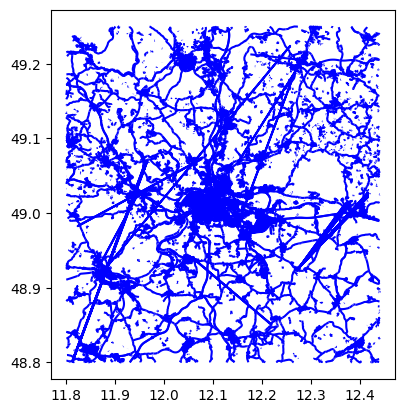

In [10]:
regensburg_geo.plot(color="blue", edgecolor="red")

<Axes: >

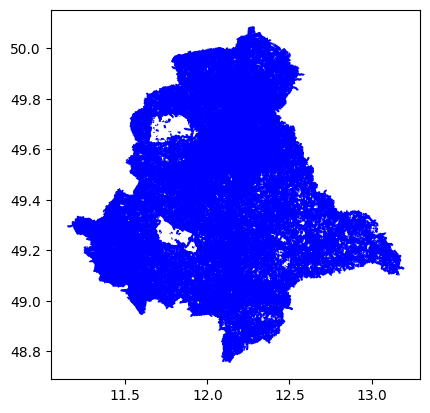

In [11]:
oberpfalz_geo.plot(color="blue", edgecolor="red")

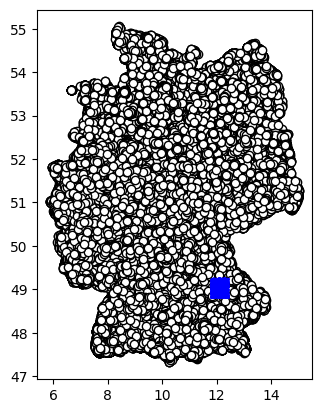

In [12]:
fig, ax = plt.subplots()

# ax.add_artist(ScaleBar(1, rotation='horizontal-only'))

regensburg_geo.to_crs(epsg=4326).plot(ax=ax, color="blue", edgecolor="black")
# gframe = cities_distances[-1][1].to_crs(epsg=3857)

# proj_frame = aware_4326_transform(gframe)

# cities.plot(ax=ax, column="city_distance", legend=True)
# cities3 = aware_3857_transform(cities)
unfall_geo.to_crs(epsg=4326).plot(ax=ax, color="white", edgecolor="black")

plt.show()

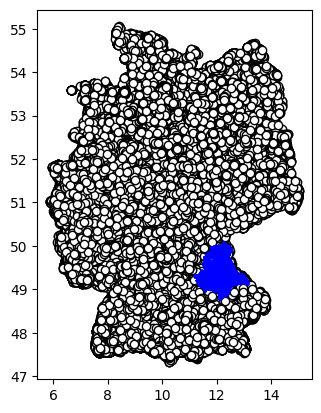

In [13]:
fig, ax = plt.subplots()

# ax.add_artist(ScaleBar(1, rotation='horizontal-only'))

oberpfalz_geo.to_crs(epsg=4326).plot(ax=ax, color="blue", edgecolor="black")
# gframe = cities_distances[-1][1].to_crs(epsg=3857)

# proj_frame = aware_4326_transform(gframe)

# cities.plot(ax=ax, column="city_distance", legend=True)
# cities3 = aware_3857_transform(cities)
unfall_geo.to_crs(epsg=4326).plot(ax=ax, color="white", edgecolor="black")

plt.show()

<Axes: >

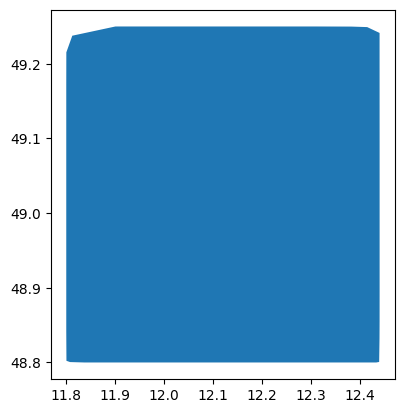

In [14]:
# regensburg_stadt = regensburg_geo.dissolve().to_crs(epsg=3857).centroid.buffer(10_000).to_crs(epsg=4326)
regensburg_stadt = regensburg_geo.dissolve().convex_hull
regensburg_stadt_bezirk = gp.GeoDataFrame(geometry=regensburg_stadt)
regensburg_stadt_bezirk.plot()

In [15]:
oberpfalz_geo = oberpfalz_geo.to_crs(epsg=3857).overlay(regensburg_stadt_bezirk.to_crs(epsg=3857), how="intersection").to_crs(epsg=4326)
oberpfalz_geo = oberpfalz_geo.to_crs(epsg=3857).overlay(
    gp.GeoDataFrame(geometry=regensburg_stadt_bezirk.to_crs(epsg=3857).centroid.buffer(10000), crs="EPSG:3857"), how="intersection").to_crs(epsg=4326)

/home/morit/Dokumente/GitHub/vru_safety_app/Unfallatlas/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


<Axes: >

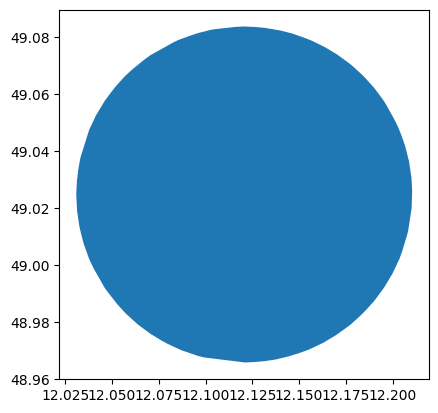

In [16]:
# regensburg_stadt = regensburg_geo.dissolve().to_crs(epsg=3857).centroid.buffer(10_000).to_crs(epsg=4326)
oberpfalz_bezirk = gp.GeoDataFrame(geometry=oberpfalz_geo.to_crs(epsg=3857).dissolve().convex_hull
).to_crs(epsg=4326)
oberpfalz_bezirk.plot()

In [17]:
oberpfalz_geo["fclass"].unique()

array(['motorway', 'tertiary', 'trunk', 'motorway_link', 'trunk_link',
       'living_street', 'residential', 'steps', 'secondary', 'footway',
       'service', 'primary', 'cycleway', 'track_grade4', 'track_grade3',
       'track_grade1', 'track_grade2', 'pedestrian', 'tertiary_link',
       'secondary_link', 'track_grade5', 'primary_link', 'busway'],
      dtype=object)

In [18]:
oberpfalz_geo.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

In [19]:
oberpfalz_geo["osm_id"].unique()

array(['4013903', '4013904', '4013905', ..., '1388380872', '1388380873',
       '1388381362'], shape=(21656,), dtype=object)

In [20]:
pd.concat([oberpfalz_geo[oberpfalz_geo["fclass"] == "footway"], oberpfalz_geo[oberpfalz_geo["fclass"] == "pedestrian"]])

osm_id  code      fclass             name   ref oneway  maxspeed  \
37        5000617  5153     footway             None  None      B         0   
45        5000625  5153     footway             None  None      B         0   
130       5076515  5153     footway             None  None      B         0   
131       5076516  5153     footway             None  None      B         0   
132       5076517  5153     footway             None  None      B         0   
...           ...   ...         ...              ...   ...    ...       ...   
21419  1384540700  5124  pedestrian  Spitalkellerweg  None      B         0   
21484  1385458091  5124  pedestrian             None  None      B         0   
21486  1385458093  5124  pedestrian             None  None      B         0   
21508  1385458141  5124  pedestrian             None  None      B         0   
21510  1385461484  5124  pedestrian             None  None      B         0   

       layer bridge tunnel                                           geometry  
37         0      F      F  LINESTRING (12.04112 49.01448, 12.04067 49.01451)  
45         0      F      F  LINESTRING (12.03937 49.01401, 12.0395 49.014,...  
130        0      F      F  LINESTRING (12.0503 49.02639, 12.05046 49.0264...  
131        0      F      F  LINESTRING (12.05429 49.02802, 12.05439 49.028...  
132        0      F      F  LINESTRING (12.05081 49.02668, 12.05066 49.02683)  
...      ...    ...    ...                                                ...  
21419      0      F      F  LINESTRING (12.09551 49.03104, 12.09548 49.031...  
21484      0      F      F  LINESTRING (12.1173 49.0177, 12.11712 49.01738...  
21486      0      F      F  LINESTRING (12.11809 49.01767, 12.11808 49.017...  
21508      0      F      F  LINESTRING (12.11763 49.01615, 12.11762 49.016...  
21510      0      F      F  LINESTRING (12.11707 49.01776, 12.11721 49.018...  

[5943 rows x 11 columns]

In [21]:
# oberpfalz_geo[oberpfalz_geo["fclass"] == "busway"].explore()

<Axes: >

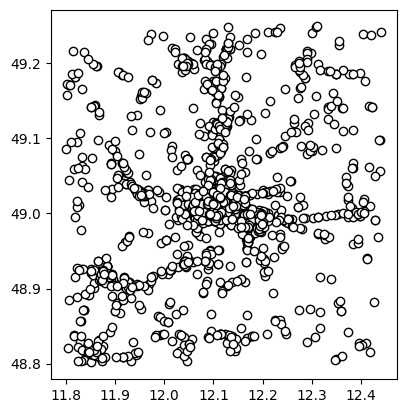

In [22]:
regensburg_unfälle = unfall_geo.overlay(regensburg_stadt_bezirk, how='intersection')
regensburg_unfälle.plot(color="white", edgecolor="black")

<Axes: >

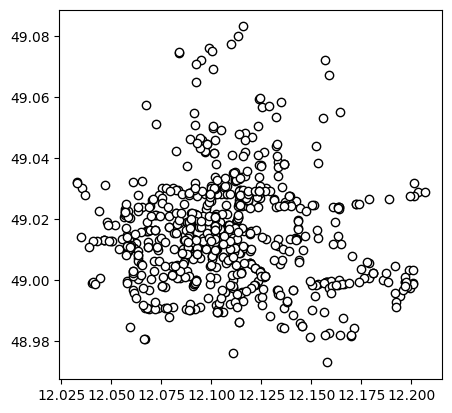

In [23]:
oberpfalz_unfälle = unfall_geo.overlay(oberpfalz_bezirk, how='intersection')
oberpfalz_unfälle.plot(color="white", edgecolor="black")

In [24]:
# road_unfall_inter = regensburg_geo.to_crs(epsg=3857).sjoin_nearest(regensburg_unfälle.to_crs(epsg=3857), max_distance=1).to_crs(epsg=4326)

In [25]:
# road_unfall_inter.explore()

In [26]:
# roadl_accident_diff = gp.GeoDataFrame(geometry=regensburg_geo \
#     .to_crs(epsg=3857) \
#     .buffer(5)) \
#     .overlay(regensburg_unfälle.to_crs(epsg=3857), how="difference") \
#     .to_crs(4326)

# roadl_accident_diff.explore()
# # roadl_accident_diff.plot()
    

In [27]:
# regensburg_geo = regensburg_geo.to_crs(epsg=3857)
# # regensburg_geo["geometry"] = regensburg_geo["geometry"].buffer(5)
# regensburg_unfälle = regensburg_unfälle.to_crs(epsg=3857)

# reg_unf_rd = regensburg_geo.sjoin_nearest(regensburg_unfälle, max_distance=1)


# regensburg_geo = regensburg_geo.to_crs(epsg=4326)
# regensburg_unfälle = regensburg_unfälle.to_crs(epsg=4326)

oberpfalz_geo = oberpfalz_geo.to_crs(epsg=3857)
# regensburg_geo["geometry"] = regensburg_geo["geometry"].buffer(5)
oberpfalz_unfälle = oberpfalz_unfälle.to_crs(epsg=3857)

obf_unf_rd = oberpfalz_geo.sjoin_nearest(oberpfalz_unfälle, max_distance=10).to_crs(epsg=4326)


oberpfalz_geo = oberpfalz_geo.to_crs(epsg=4326)
oberpfalz_unfälle = oberpfalz_unfälle.to_crs(epsg=4326)

obf_unf_rd

osm_id  code       fclass                   name   ref oneway  \
2         4013905  5111     motorway                   None   A 3      F   
5         4051100  5115     tertiary             Isarstraße  None      B   
9         4051627  5112        trunk  Lappersdorfer Kreisel  B 16      F   
21        4925634  5122  residential        Schützenheimweg  None      B   
47        5000627  5115     tertiary       Lilienthalstraße  None      F   
...           ...   ...          ...                    ...   ...    ...   
21403  1384033829  5153      footway                   None  None      B   
21404  1384033830  5153      footway                   None  None      B   
21406  1384033835  5115     tertiary       Greflingerstraße  None      F   
21454  1385110807  5152     cycleway                   None  None      B   
21465  1385311979  5152     cycleway                   None  None      B   

       maxspeed  layer bridge tunnel  ... IstPKW  IstFuss IstKrad IstGkfz  \
2           100      0      F      F  ...      1        0       0       1   
5            50      0      F      F  ...      1        0       0       0   
9            60      0      F      F  ...      1        0       0       1   
21           30      0      F      F  ...      1        0       1       0   
47           50      0      F      F  ...      0        0       0       0   
...         ...    ...    ...    ...  ...    ...      ...     ...     ...   
21403         0      0      F      F  ...      0        0       0       0   
21404         0      0      F      F  ...      1        0       0       0   
21406        50      0      F      F  ...      0        0       0       0   
21454         0      0      F      F  ...      1        1       0       0   
21465         0      0      F      F  ...      1        0       0       0   

      IstSonstig      LINREFX       LINREFY  XGCSWGS84  YGCSWGS84 PLST  
2              0  724356.5488  5.430965e+06  12.067025  48.990790    1  
5              0  727605.9223  5.435855e+06  12.114118  49.033519    1  
9              0  726200.7437  5.436992e+06  12.095556  49.044257    1  
21             0  722482.1384  5.433340e+06  12.042740  49.012796    1  
47             0  723717.8779  5.433226e+06  12.059553  49.011333    1  
...          ...          ...           ...        ...        ...  ...  
21403          0  727121.3864  5.433706e+06  12.106296  49.014395    1  
21404          0  727124.0197  5.433715e+06  12.106337  49.014482    1  
21406          0  727343.1371  5.433663e+06  12.109300  49.013928    1  
21454          0  727606.4355  5.433617e+06  12.112870  49.013416    1  
21465          0  728111.4523  5.433937e+06  12.119946  49.016107    1  

[1387 rows x 37 columns]

In [28]:
# reg_unf_rd.explore()
# obf_unf_rd.explore()

<Axes: >

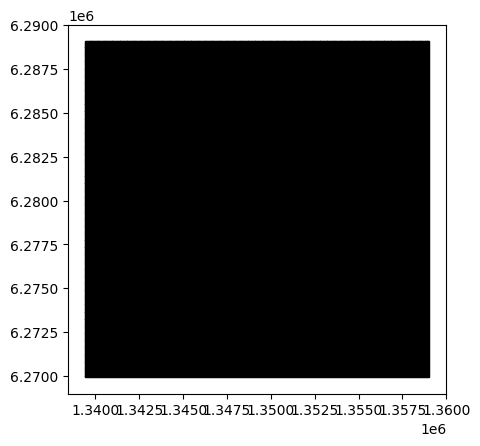

In [29]:
obf_und_rd_area = obf_unf_rd.to_crs(epsg=3857)
obf_tiles = list()

cell_size = 50
xmin, ymin, xmax, ymax = obf_und_rd_area.total_bounds

# cell_id = 0

# for x in np.arange(xmin, xmax, cell_size):
#     for y in np.arange(ymin, ymax, cell_size):
#         # Create a rectangle
#         rect = gp.GeoDataFrame(geometry=[sg.box(x, y, x + cell_size, y + cell_size)], crs=obf_und_rd_area.crs)
#         rect["cell_id"] = cell_id
#         cell_id += 1
#         obf_tiles.append(rect)
#         # Check if the rectangle intersects with the area
#         # if obf_und_rd_area.intersects(rect, align=True).any():
#         #     # If it does, add it to the GeoDataFrame
#         #     obf_tiles = obf_tiles.append(rect)


# obf_tiles_geo = pd.concat(obf_tiles)
# obf_tiles_geo.plot(color="white", edgecolor="black")

from shapely.geometry import box

# Vectorized creation of grid cells using numpy arrays for better performance
x_coords = np.arange(xmin, xmax, cell_size)
y_coords = np.arange(ymin, ymax, cell_size)
xx, yy = np.meshgrid(x_coords, y_coords)
xx_flat = xx.ravel()
yy_flat = yy.ravel()


rects = [
    {
        "geometry": box(x, y, x + cell_size, y + cell_size),
        "cell_id": i
    }
    for i, (x, y) in enumerate(zip(xx_flat, yy_flat))
]

obf_tiles_geo = gp.GeoDataFrame(rects, crs=obf_und_rd_area.crs).to_crs(epsg=3857)
obf_tiles_geo.plot(color="white", edgecolor="black")

In [30]:
# obf_tiles_geo.overlay(oberpfalz_bezirk, how="intersection").plot(color="white", edgecolor="black")
# type(obf_tiles_geo.overlay(oberpfalz_bezirk, how="intersection"))

<Axes: >

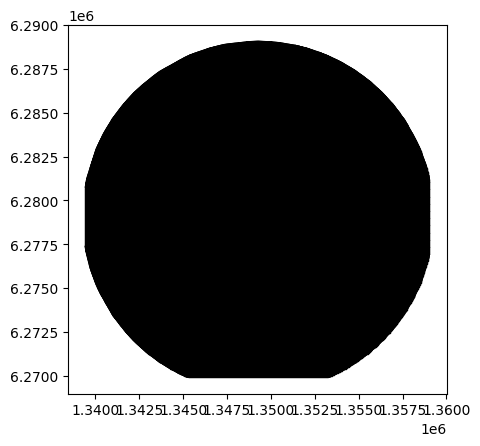

In [31]:
oberpfalz_bezirk = oberpfalz_bezirk.to_crs(epsg=3857)
obf_tiles_geo_lim = obf_tiles_geo.overlay(oberpfalz_bezirk, how="intersection") 
obf_tiles_geo_lim.plot(color="white", edgecolor="black")

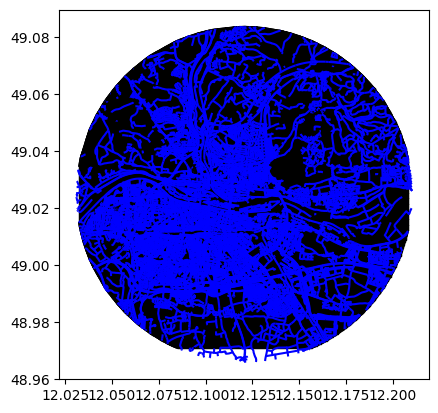

In [32]:
fig, ax = plt.subplots()

# ax.add_artist(ScaleBar(1, rotation='horizontal-only'))

oberpfalz_geo.to_crs(epsg=4326).plot(ax=ax, color="blue", edgecolor="black")
# gframe = cities_distances[-1][1].to_crs(epsg=3857)

# proj_frame = aware_4326_transform(gframe)

# cities.plot(ax=ax, column="city_distance", legend=True)
# cities3 = aware_3857_transform(cities)
obf_tiles_geo_lim.to_crs(epsg=4326).plot(ax=ax, color="white", edgecolor="black")

plt.show()

In [33]:
# pd.concat([obf_tiles_geo_lim, obf_und_rd_area]).to_crs(epsg=4326).explore()   

In [34]:
obf_tiles_geo_lim.columns

Index(['cell_id', 'geometry'], dtype='object')

In [35]:
obf_tiles_geo_lim.columns

Index(['cell_id', 'geometry'], dtype='object')

In [36]:
obf_tiles_inter = obf_tiles_geo_lim.to_crs(epsg=4326).sjoin(obf_unf_rd.drop(['index_right'], axis=1), how="inner", predicate="intersects")
obf_tiles_inter

cell_id                                           geometry  \
66          180  POLYGON ((12.1131 48.97091, 12.1131 48.9712, 1...   
158         272  POLYGON ((12.15442 48.97091, 12.15442 48.9712,...   
159         273  POLYGON ((12.15487 48.97091, 12.15487 48.9712,...   
160         274  POLYGON ((12.15532 48.97091, 12.15532 48.9712,...   
233         571  POLYGON ((12.11265 48.9712, 12.11265 48.9715, ...   
...         ...                                                ...   
123621   149146  POLYGON ((12.11579 49.08283, 12.11579 49.08312...   
123675   149537  POLYGON ((12.11534 49.08312, 12.11534 49.08341...   
123676   149538  POLYGON ((12.11579 49.08312, 12.11579 49.08341...   
123716   149930  POLYGON ((12.11624 49.08341, 12.11579 49.08341...   
123717   149931  POLYGON ((12.11669 49.08341, 12.11624 49.08341...   

        index_right     osm_id  code        fclass                 name  \
66             3228   29490561  5145  track_grade3                 None   
158             203    5121927  5122   residential         Am Bergacker   
159             203    5121927  5122   residential         Am Bergacker   
160             203    5121927  5122   residential         Am Bergacker   
233            3228   29490561  5145  track_grade3                 None   
...             ...        ...   ...           ...                  ...   
123621         3050   29187950  5122   residential      Aussiger Straße   
123675         9451  265084871  5114     secondary  Schwandorfer Straße   
123676         9451  265084871  5114     secondary  Schwandorfer Straße   
123716         9451  265084871  5114     secondary  Schwandorfer Straße   
123717         9451  265084871  5114     secondary  Schwandorfer Straße   

            ref oneway  maxspeed  ...  IstPKW IstFuss IstKrad IstGkfz  \
66         None      B         0  ...       0       0       0       0   
158        None      B        30  ...       1       0       0       0   
159        None      B        30  ...       1       0       0       0   
160        None      B        30  ...       1       0       0       0   
233        None      B         0  ...       0       0       0       0   
...         ...    ...       ...  ...     ...     ...     ...     ...   
123621     None      B        30  ...       1       0       0       0   
123675  St 2397      B        50  ...       1       0       0       0   
123676  St 2397      B        50  ...       1       0       0       0   
123716  St 2397      B        50  ...       1       0       0       0   
123717  St 2397      B        50  ...       1       0       0       0   

       IstSonstig        LINREFX       LINREFY  XGCSWGS84  YGCSWGS84 PLST  
66              0  727616.573486  5.429438e+06  12.110668  48.975875    2  
158             0  731098.635100  5.429246e+06  12.158070  48.972860    1  
159             0  731098.635100  5.429246e+06  12.158070  48.972860    1  
160             0  731098.635100  5.429246e+06  12.158070  48.972860    1  
233             0  727616.573486  5.429438e+06  12.110668  48.975875    2  
...           ...            ...           ...        ...        ...  ...  
123621          0  727496.254900  5.441367e+06  12.115716  49.083075    1  
123675          0  727496.254900  5.441367e+06  12.115716  49.083075    1  
123676          0  727496.254900  5.441367e+06  12.115716  49.083075    1  
123716          0  727496.254900  5.441367e+06  12.115716  49.083075    1  
123717          0  727496.254900  5.441367e+06  12.115716  49.083075    1  

[10550 rows x 38 columns]

In [37]:
obf_tiles_inter.columns

Index(['cell_id', 'geometry', 'index_right', 'osm_id', 'code', 'fclass',
       'name', 'ref', 'oneway', 'maxspeed', 'layer', 'bridge', 'tunnel',
       'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR',
       'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1',
       'ULICHTVERH', 'IstStrasse', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'PLST'],
      dtype='object')

In [38]:
print(len(obf_tiles_inter))
print(len(obf_tiles_inter["cell_id"].unique()))

10550
7733


In [39]:
danger_groups = obf_tiles_inter.groupby("cell_id").size().reset_index(name="danger_score")

danger_scored = obf_tiles_inter.merge(danger_groups, on="cell_id", how="inner")

# .dissolve(by="danger_score").reset_index() \

danger_scored_groups = danger_scored \
    .dissolve(by="cell_id") \
    .reset_index() \
    [["cell_id", "danger_score", "geometry"]]

danger_scored_groups

cell_id  danger_score                                           geometry
0         180             1  POLYGON ((12.1131 48.97091, 12.1131 48.9712, 1...
1         272             1  POLYGON ((12.15442 48.97091, 12.15442 48.9712,...
2         273             1  POLYGON ((12.15487 48.97091, 12.15487 48.9712,...
3         274             1  POLYGON ((12.15532 48.97091, 12.15532 48.9712,...
4         571             1  POLYGON ((12.11265 48.9712, 12.11265 48.9715, ...
...       ...           ...                                                ...
7728   149146             1  POLYGON ((12.11579 49.08283, 12.11579 49.08312...
7729   149537             1  POLYGON ((12.11534 49.08312, 12.11534 49.08341...
7730   149538             1  POLYGON ((12.11579 49.08312, 12.11579 49.08341...
7731   149930             1  POLYGON ((12.11624 49.08341, 12.11579 49.08341...
7732   149931             1  POLYGON ((12.11669 49.08341, 12.11624 49.08341...

[7733 rows x 3 columns]

In [40]:
danger_scored_groups["danger_score"].unique()

array([ 1,  2,  3,  4,  5,  9,  6,  7, 10, 11,  8, 19, 16, 14])

In [41]:
# danger_scored_groups = danger_scored_groups[danger_scored_groups["danger_score"] > 4]

danger_scored_groups.explore(column="danger_score", legend=True, cmap='YlOrRd')

In [42]:
all_tiles = json.loads(danger_scored_groups.to_json())

with open("regensburg_tiles.json", "w") as f:
    json.dump(all_tiles, f, indent=2)


In [43]:
danger_low = danger_scored_groups[danger_scored_groups["danger_score"] <= 3].to_crs(epsg=4326)
danger_med = danger_scored_groups[danger_scored_groups["danger_score"] > 3][danger_scored_groups["danger_score"] <= 8].to_crs(epsg=4326)
danger_high = danger_scored_groups[danger_scored_groups["danger_score"] > 8].to_crs(epsg=4326)

/home/morit/Dokumente/GitHub/vru_safety_app/Unfallatlas/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


In [44]:
print(len(danger_scored_groups), len(danger_low), len(danger_med), len(danger_high))

7733 7511 210 12


In [45]:
low_json = danger_low.dissolve().to_json()
med_json = danger_med.dissolve().to_json()
high_json = danger_high.dissolve().to_json()

In [46]:
custom_model = {
    "speed": [
    {
      "if": "true",
      "limit_to": 5.0
    }
  ],
  "priority": [
    {
      "if": "in_lowdanger",
      "multiply_by": "0.9"
    },
    {
      "if": "in_meddanger",
      "multiply_by": "0.5"
    },
    {
      "if": "in_highdanger",
      "multiply_by": "0.1"
    }
  ],
  "areas": {
    "type": "FeatureCollection",
    "features": []
  }
}

low_json1 = json.loads(low_json)["features"][0]
low_json1["id"] = "lowdanger"

med_json1 = json.loads(med_json)["features"][0]
med_json1["id"] = "meddanger"

high_json1 = json.loads(high_json)["features"][0]
high_json1["id"] = "highdanger"

custom_model["areas"]["features"].append(low_json1)
custom_model["areas"]["features"].append(med_json1)
custom_model["areas"]["features"].append(high_json1)

json.dumps(custom_model, indent=2)

with open("custom_model.json", "w") as f:
    json.dump(custom_model, f, indent=2)